In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


data_train = pd.read_csv('D:\Python\Kaggle Datasets\Mercedes_train.csv')
data_test = pd.read_csv('D:\Python\Kaggle Datasets\Mercedes_test.csv')

In [218]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
print(data_train.head())
#print(data_train.describe())
print(data_test.head())


   ID       y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  \
0   0  130.81   k  v  at  a  d  u  j  o    0    0    0    1    0    0    0   
1   6   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0   
2   7   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    0   
3   9   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0   
4  13   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0   

   X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  \
0    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    1    0    0    0    0    0    0    0    1    0    0    0    1    0   
2    1    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
3    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
4    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   

   X33  X34  X35  X36  X37  X38  X39  X40  X41  X4

In [219]:
data_train.drop('ID',axis=1,inplace=True)
id_test = data_test['ID']
data_test.drop('ID',inplace=True,axis=1)


In [220]:
for i in range(1,9):
    print(len(data_train.iloc[:,i].unique()),len(data_test.iloc[:,i-1].unique()))

47 49
27 27
44 45
7 7
4 4
29 32
12 12
25 25


In [224]:
#Label Encoding categorical features:-
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
col = data_train.columns
le = LabelEncoder()
#print(data_train[col[1]])
for i in range(1,9):
    le.fit(list(data_train.iloc[:,i])+list(data_test.iloc[:,i-1]))
    data_train[col[i]]=le.transform(data_train.iloc[:,i])
    data_test[col[i]]=le.transform(data_test.iloc[:,i-1])
    


In [225]:
col1 = [col[i] for i in range(0,9)]
print(data_train.head())

        y  X0  X1  X2  X3  X4  X5  X6  X8  X10  X11  X12  X13  X14  X15  X16  \
0  130.81  37  23  20   0   3  27   9  14    0    0    0    1    0    0    0   
1   88.53  37  21  22   4   3  31  11  14    0    0    0    0    0    0    0   
2   76.26  24  24  38   2   3  30   9  23    0    0    0    0    0    0    0   
3   80.62  24  21  38   5   3  30  11   4    0    0    0    0    0    0    0   
4   78.02  24  23  38   5   3  14   3  13    0    0    0    0    0    0    0   

   X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  \
0    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    1    0    0    0    0    0    0    0    1    0    0    0    1    0   
2    1    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
3    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
4    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   

   X33  X34  X35  X36  X37  X38  X39  

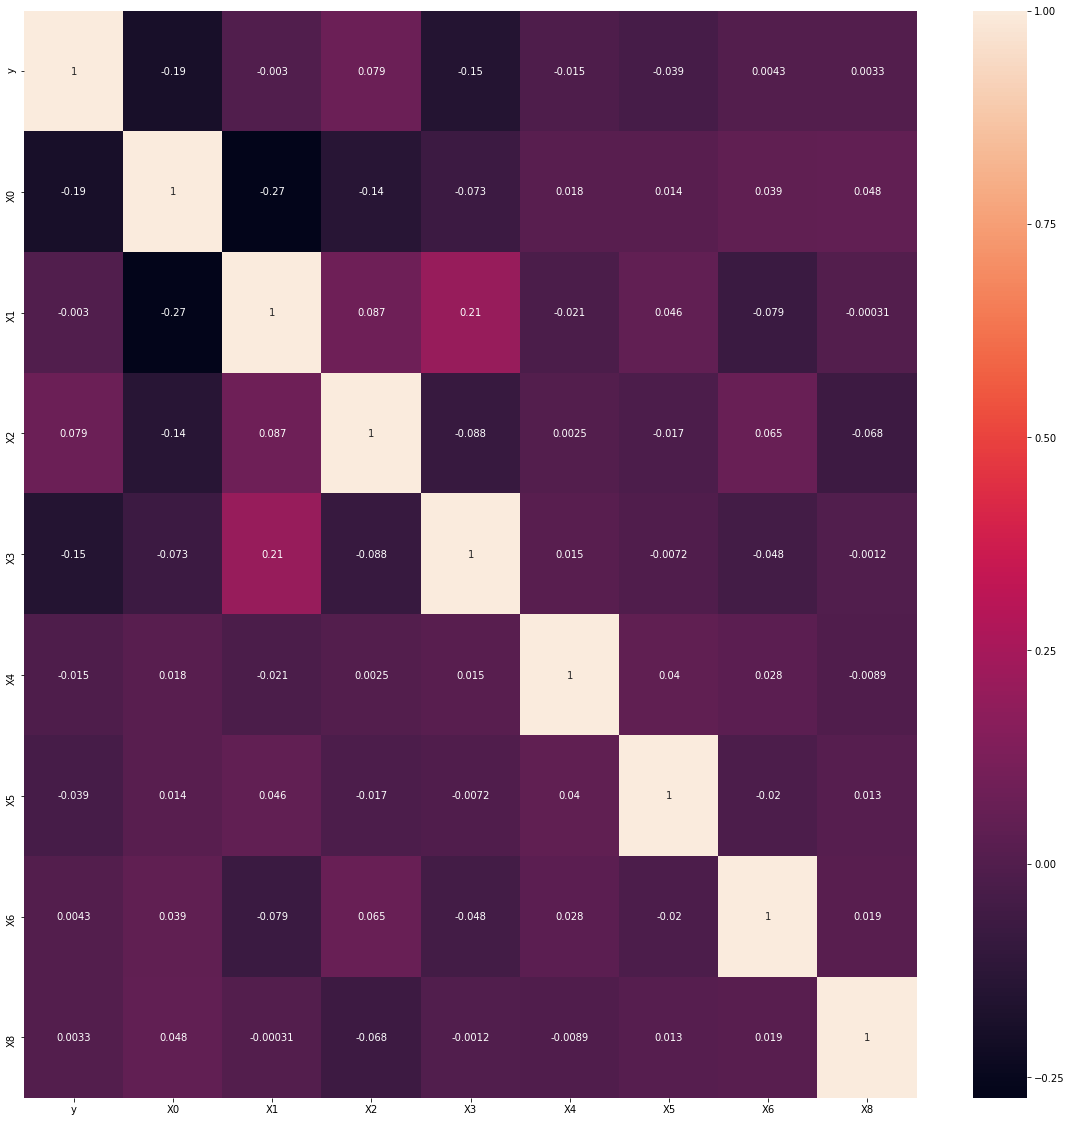

In [226]:
corr = data_train[col1].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [227]:
#No Correlation of categorical variables to y
#One hot encoding train set and test set with adding col 2 , col5 to 0 in train set



In [228]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
data_train_X = data_train.iloc[:,1:]
data_train_Y = data_train.iloc[:,0]
pca = PCA()
pca.fit(data_train_X)
l = pca.explained_variance_ratio_
sum = 0
total_variance = []
for i in l:
    sum+=i
    total_variance.append(sum)
print(total_variance)    

[0.40868987924377098, 0.62627495604184991, 0.75747576448754272, 0.86531098708313692, 0.94696346596423409, 0.96105686869038909, 0.9676663803998985, 0.97151297231669964, 0.97411586169982167, 0.97625964314269698, 0.9783582139241086, 0.98016208956546813, 0.98164225464463539, 0.98295388890072832, 0.98409437690200419, 0.9850129413071288, 0.98586226069161442, 0.98665785270294781, 0.98735422302283105, 0.98798260002246119, 0.98855486811180338, 0.98910790263633619, 0.98962645470204158, 0.99008130647615966, 0.99051158014284846, 0.99089555876207447, 0.9912622675928966, 0.99159692822125889, 0.99192442764844124, 0.99223982090781471, 0.99253287624334108, 0.99281147550977555, 0.99307664891955616, 0.99332797807789508, 0.99356546269039825, 0.99378561590857306, 0.99398181326334933, 0.99417220573003928, 0.99435559428142395, 0.99452954701461171, 0.99469539684088082, 0.99485385880131527, 0.99500963157822309, 0.99516416859379897, 0.99531555194275678, 0.99545133029897537, 0.99558375787645592, 0.99571111424183

In [229]:
pca = PCA(10)
pca.fit(data_train_X)
data_train_XTrans = pca.transform(data_train_X)
print(pca.explained_variance_ratio_)
train_x,test_x, train_y,test_y = train_test_split(data_train_XTrans, data_train_Y,test_size=0.33)

[ 0.40868988  0.21758508  0.13120081  0.10783522  0.08165248  0.0140934
  0.00660951  0.00384659  0.00260289  0.00214378]


In [230]:
pca = PCA(n_components=10)
data_test_XTrans = pca.fit_transform(data_test)

In [253]:
from sklearn.linear_model import ElasticNetCV
reg2 = ElasticNetCV(max_iter=10000)
reg2.fit(train_x,train_y)
print(reg2.score(train_x,train_y))
print(reg2.score(test_x,test_y))

0.264498682139
0.264426014662


In [233]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[1,2,5,10],'loss':['linear']}
reg3 = GridSearchCV(AdaBoostRegressor(),param_grid = params,n_jobs=-1)
reg3.fit(train_x,train_y)

print(reg3.score(train_x,train_y))
print(reg3.score(test_x,test_y))


0.233869315299
0.239041086555


In [235]:
print(reg3.best_params_)

{'loss': 'linear', 'n_estimators': 1}


In [260]:
from sklearn.ensemble import RandomForestRegressor
params = {'max_depth':[10],'n_estimators':[1000,1500,2000]}
reg4 = GridSearchCV(RandomForestRegressor(verbose=9,n_jobs=-1),param_grid=params,n_jobs=-1,verbose=9)

In [262]:
reg4.fit(train_x,train_y)
print(reg4.score(train_x,train_y))
print(reg4.score(test_x,test_y))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   14.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s


0.770576794405


[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    0.8s finished


0.472562072899


In [263]:
print(reg4.best_params_)

{'max_depth': 10, 'n_estimators': 1500}


In [264]:
print(reg5.best_params_)
pred = reg4.predict(data_test_XTrans)

{'max_depth': 8, 'n_estimators': 50}


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    1.3s finished


In [272]:
import xgboost as xgb 
y_mean = train_y.mean()
params = {'n_estimators':[300,500,1000],'max_depth':[3,5],}
reg5 = GridSearchCV(xgb.XGBRegressor(base_score=y_mean),param_grid = params)
reg5.fit(train_x,train_y)
print(reg5.score(train_x,train_y))
print(reg5.score(train_x,train_y))

0.702773010989
0.702773010989


In [273]:
submission = pd.DataFrame(columns=['id','y'])
submission['id'] = id_test
submission['y'] = pred
submission

,id,y
0,1,92.675506
1,2,97.663656
2,3,91.184440
3,4,92.744819
4,5,107.754551
5,8,88.440601
6,10,109.567978
7,11,99.190914
8,12,102.709325
9,14,99.219395


In [274]:
submission.to_csv('D:\Python\Kaggle Datasets\Car insurance_subm.csv',index=False)